# Lasso and Ridge Regression


# Example 1

In [4]:
# Importing necessary packages and functions required
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')# Reading the dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
crime = pd.read_csv(url, header=None, na_values=['?'])
crime.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [5]:
crime[127].describe()

count    1994.000000
mean        0.237979
std         0.232985
min         0.000000
25%         0.070000
50%         0.150000
75%         0.330000
max         1.000000
Name: 127, dtype: float64

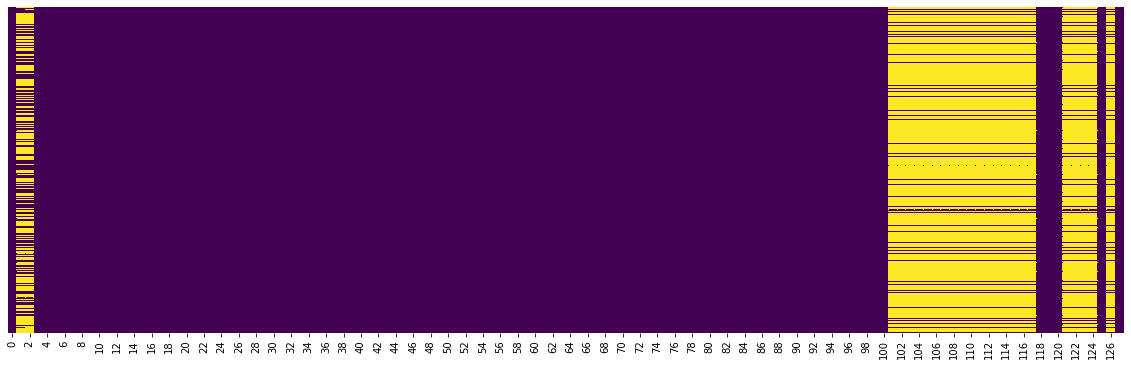

In [6]:
plt.figure(figsize=(20, 6))
sns.heatmap(crime.isnull(),yticklabels=False,cbar=False,cmap='viridis')

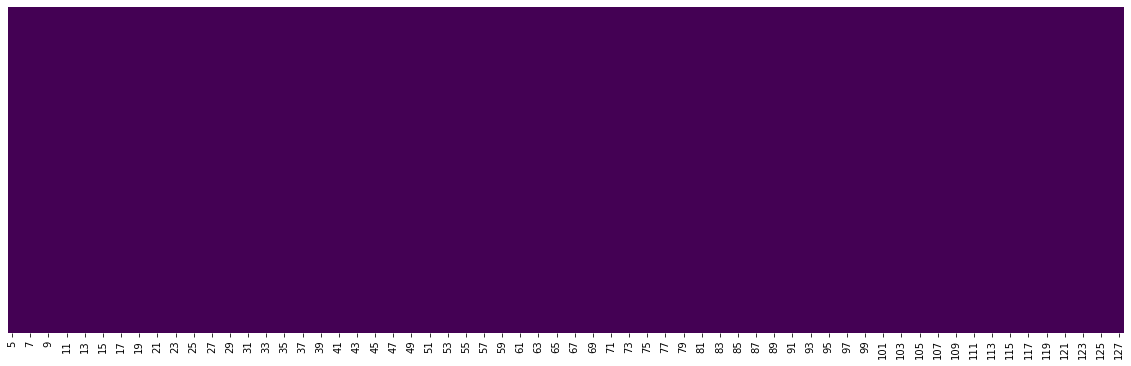

In [7]:
crime.drop([0, 1, 2, 3, 4], axis=1, inplace=True)# removing missing values
crime.dropna(inplace=True)
plt.figure(figsize=(20, 6))
sns.heatmap(crime.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
crime.shape

(319, 123)

In [9]:
# defining X and y
X = crime.drop(127, axis=1)
y = crime[127]

In [10]:
# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=1)

# Linear regression

In [11]:
# build a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
print ("iNTERCEPT : ",linreg.intercept_)
print ("CO-EFFICIENT : ",linreg.coef_)

iNTERCEPT :  0.9922125287584072
CO-EFFICIENT :  [-3.93018330e+00  7.31324716e-01 -3.01181421e-01 -2.96634778e-01
 -1.83170801e-01  2.81575284e-01 -1.48744636e+00 -4.84695533e-01
  1.24104896e+00 -5.32282788e-01  4.64331123e+00 -1.17079618e-01
  1.04229108e+00  1.36950901e-01 -3.12434116e-01 -1.16489196e+00
  5.37252913e-01  7.49655606e-01 -8.02500871e-02  8.42449509e-01
 -1.98951720e-01 -3.17193999e-01 -4.31217869e-01  1.19357660e-01
 -1.83148129e-01  2.11602690e-01 -1.57441950e-01 -1.03051105e+00
  1.49628176e+00  1.86093900e-01 -1.12289917e+00 -1.13107576e-02
  1.22670519e-01  1.46348876e-01 -1.64172731e-01 -3.73690589e-02
  1.92733806e-01  4.34808503e-01  2.32870361e+00 -5.15176228e-01
  2.64683754e+00 -5.48075999e+00  9.63873430e-01 -1.15021921e+00
 -1.15575665e+00  1.10543276e+00  2.41469970e-01 -6.32209680e-01
  6.01741978e-01  8.37645340e-02  1.05006759e-01 -2.58807800e-01
  5.31513493e-01 -8.57090632e-01 -3.29684470e-01  6.61114510e-01
 -5.61884511e-01  6.27806334e-01  2.798480

In [12]:
y_pred = linreg.predict(X_test)

In [13]:
# calculate R^2 value, MAE, MSE, RMSE

from sklearn.metrics import r2_score
from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.1970445629540899


mean_absolute_error : 0.1672515582488837


mean_squared_error :  0.04986345422693411


root_mean_squared_error :  0.2233012633796193


# Ridge regression
alpha: must be positive, increase for more regularization
normalize: scales the features (without using StandardScaler)

In [14]:
# alpha=0 is equivalent to linear regression
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.19704456295863382


mean_absolute_error : 0.16725155824816149


mean_squared_error :  0.04986345422665194


root_mean_squared_error :  0.2233012633789875


In [15]:
# try alpha=0.1
ridgereg = Ridge(alpha=0.1, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)

# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.5347697501566349


mean_absolute_error : 0.12769772972161883


mean_squared_error :  0.028890753082631383


root_mean_squared_error :  0.16997280100837128


In [16]:
# examing the coefficients
print(ridgereg.coef_)

[-5.77226675e-03  2.26721774e-02  4.98857382e-02 -6.70174168e-02
 -1.83566112e-02  5.26888536e-02  1.17689929e-02 -5.72468914e-02
  1.52761058e-03  4.29131248e-02  1.04586550e-04 -1.85621890e-02
  5.07008262e-02 -9.63941391e-02 -1.58499805e-01 -3.28082329e-01
 -1.43015949e-02  8.97253556e-02 -1.10520025e-01  8.02961453e-02
 -2.01498712e-02  7.77242382e-03 -8.07823610e-02 -1.39148634e-01
 -1.19008810e-02  1.00148033e-01  3.61850806e-02 -9.71628046e-02
  6.94268658e-02 -8.81688130e-02 -9.79415666e-02 -4.99145470e-03
  1.28541873e-01 -4.15102106e-02 -1.35952164e-01  4.09752240e-02
  7.00727085e-02 -1.86859042e-02  5.95401646e-02  6.28621417e-02
 -3.91478791e-02  8.48551263e-03  7.31545217e-02 -1.28265573e-01
 -1.22240655e-01 -7.02441332e-02 -7.10900893e-02 -6.33671556e-02
  1.01095274e-01 -5.22454503e-02  1.15465301e-01 -7.35016006e-02
 -4.79847841e-03 -1.10878367e-01  6.49567154e-02  4.12339751e-02
 -1.06606017e-02  1.32494298e-03  1.81063822e-02 -1.85567810e-03
 -1.32904914e-02  3.94493

In [20]:
# create an array of alpha values
alpha_range = 10.**np.arange(-2, 3)
alpha_range
array = [1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]# select the best alpha with RidgeCV
from sklearn.linear_model import RidgeCV
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='neg_mean_squared_error')
ridgeregcv.fit(X_train, y_train)
ridgeregcv.alpha_

1.0

In [21]:
# predict method uses the best alpha value
y_pred = ridgeregcv.predict(X_test)# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.5318623469518293


mean_absolute_error : 0.13256644483823624


mean_squared_error :  0.02907130253772372


root_mean_squared_error :  0.1705030865929521


# Lasso regression

    
    alpha: must be positive, increase for more regularization
    normalize: scales the features (without using StandardScaler)

In [22]:
# try alpha=0.001 and examine coefficients
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(X_train, y_train)
print(lassoreg.coef_)

[ 0.          0.          0.         -0.25339884  0.          0.
  0.         -0.         -0.          0.          0.          0.
 -0.         -0.         -0.         -0.17865705  0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.02230294
 -0.          0.          0.          0.          0.0998841  -0.
  0.         -0.          0.01893786 -0.         -0.03169217  0.
  0.         -0.          0.11479343  0.          0.          0.
  0.         -0.16845012 -0.27294066 -0.         -0.         -0.
 -0.          0.          0.          0.          0.         -0.
  0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.          0.          0.
  0.         -0.          0.          0.02709397 -0.          0.
 -0.         -0.          0.          0.          0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.         -0.         -0.          0.00233805
  0.15404

In [23]:
# try alpha=0.01 and examine coefficients
lassoreg = Lasso(alpha=0.01, normalize=True)
lassoreg.fit(X_train, y_train)
print(lassoreg.coef_)

[ 0.          0.          0.         -0.04214088  0.          0.
  0.          0.          0.         -0.          0.          0.
 -0.         -0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.          0.          0.
  0.         -0.          0.         -0.         -0.          0.
  0.         -0.          0.          0.          0.          0.
  0.         -0.         -0.29715868 -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.          0.          0.
  0.         -0.          0.          0.         -0.          0.
 -0.         -0.          0.          0.         -0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
  0.          0.         

In [24]:
# calculate RMSE (for alpha=0.01)
y_pred = lassoreg.predict(X_test)# calculate MAE, MSE, RMSE
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.3241322659149898


mean_absolute_error : 0.16889755277533727


mean_squared_error :  0.04197132028397072


root_mean_squared_error :  0.20486903202770965


In [25]:
# select the best alpha with LassoCV
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(n_alphas=100, normalize=True, random_state=1)
lassoregcv.fit(X_train, y_train)
print('alpha : ',lassoregcv.alpha_)

alpha :  0.0016878682947072093


In [26]:
# examine the coefficients
print(lassoregcv.coef_)

[ 0.          0.          0.         -0.26320105  0.          0.
  0.          0.          0.          0.          0.          0.
 -0.         -0.         -0.         -0.1285917   0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.         -0.          0.          0.11511909  0.
  0.         -0.          0.         -0.         -0.          0.
  0.         -0.          0.04667596  0.          0.          0.08875875
  0.         -0.09735466 -0.3276063  -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.          0.          0.
  0.         -0.          0.          0.         -0.          0.
 -0.         -0.          0.          0.          0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
  0.14776487  0. 

In [27]:
# predict method uses the best alpha value
y_pred = lassoregcv.predict(X_test)
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.5506049113488304


mean_absolute_error : 0.13416628182873494


mean_squared_error :  0.027907391118998506


root_mean_squared_error :  0.16705505415580368


# Example 2

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [29]:
DATAPATH = 'Advertising.csv'

data = pd.read_csv(DATAPATH)
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [30]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [31]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [32]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [33]:
def scatter_plot(feature, target):
    plt.figure(figsize=(16, 8))
    plt.scatter(
        data[feature],
        data[target],
        c='black'
    )
    plt.xlabel("Money spent on {} ads ($)".format(feature))
    plt.ylabel("Sales ($k)")
    plt.show()

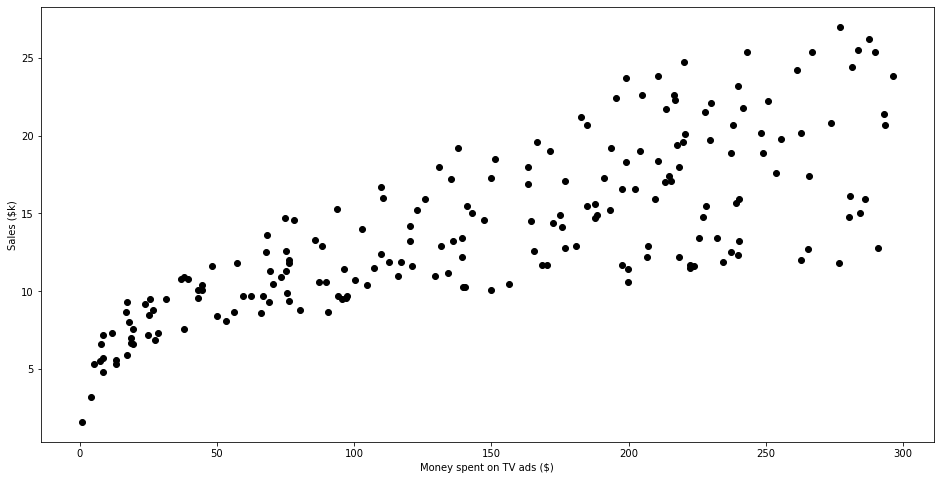

In [34]:
scatter_plot('TV', 'sales')

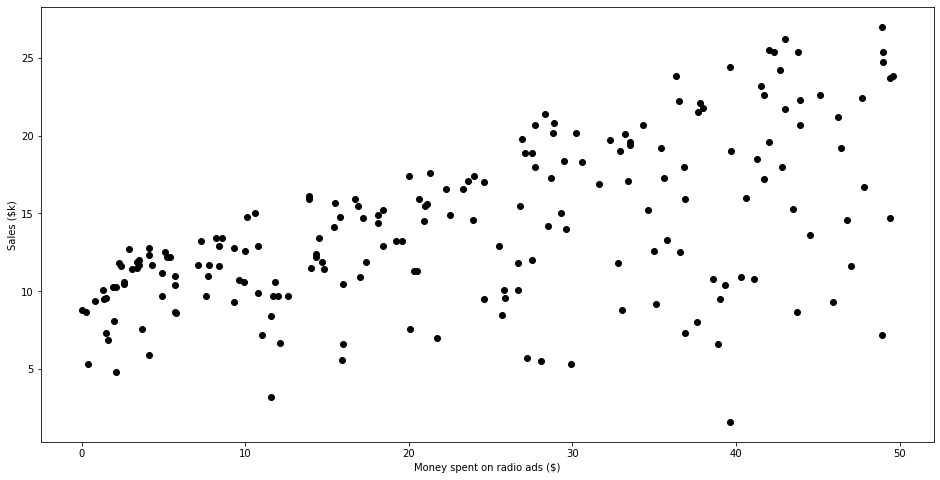

In [35]:
scatter_plot('radio', 'sales')

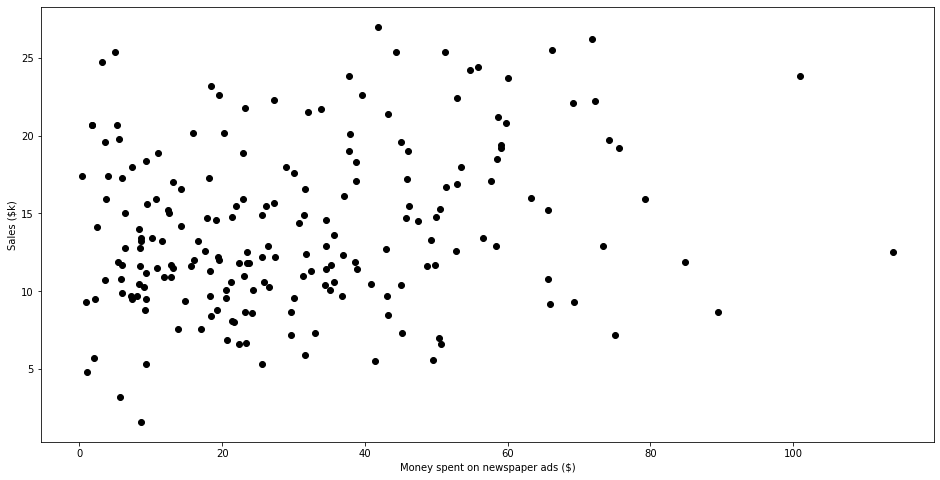

In [36]:
scatter_plot('newspaper', 'sales')

# Modelling

# Multiple linear regression - least squares fitting

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

Xs = data.drop(['sales'], axis=1)
y = data['sales'].values.reshape(-1,1)

lin_reg = LinearRegression()

MSEs = cross_val_score(lin_reg, Xs, y, scoring='neg_mean_squared_error', cv=5)

mean_MSE = np.mean(MSEs)

print(mean_MSE)

-3.07294659710021


# Ridge regression

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(Xs, y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [39]:
ridge_regressor.best_params_

{'alpha': 20}

In [40]:
ridge_regressor.best_score_

-3.072671338341143

# Lasso

In [41]:
from sklearn.linear_model import Lasso

lasso = Lasso()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5)

lasso_regressor.fit(Xs, y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [42]:
lasso_regressor.best_params_

{'alpha': 1}

In [43]:
lasso_regressor.best_score_

-3.041405896751369